# DELIVERY TIME ANALYSIS

In [1]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/ASSIGNMENTS/Day 21 - 14th May/Simple Linear Regression/Assignment 1/delivery_time.csv ")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(5))

   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [4]:
# renaming the columns--
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
print(data.head(5))

   delivery_time  sorting_time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [5]:
# reindexing the columns--
order=["sorting_time","delivery_time"]
data=data.reindex(columns=order)
print(data.head())

   sorting_time  delivery_time
0            10          21.00
1             4          13.50
2             6          19.75
3             9          24.00
4            10          29.00


In [6]:
# checking the missing values--
data.isnull().sum()

sorting_time     0
delivery_time    0
dtype: int64

In [7]:
# printing the basic info about data--
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")

Index(['sorting_time', 'delivery_time'], dtype='object')
Data types---
sorting_time       int64
delivery_time    float64
dtype: object
Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sorting_time   21 non-null     int64  
 1   delivery_time  21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
None


# Exploratory Data Analysis

<Axes: xlabel='sorting_time'>

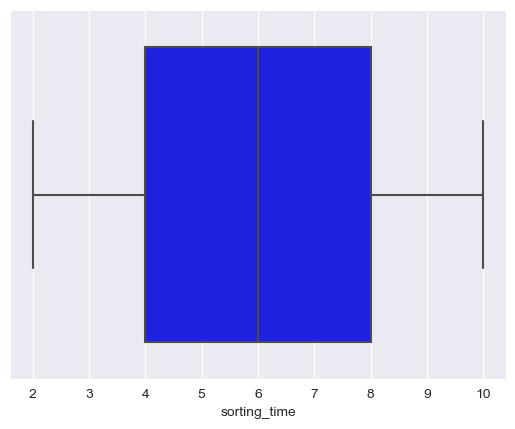

In [8]:
# checking the outliers--
sns.boxplot(x=data["sorting_time"],color="blue")

<Axes: xlabel='delivery_time'>

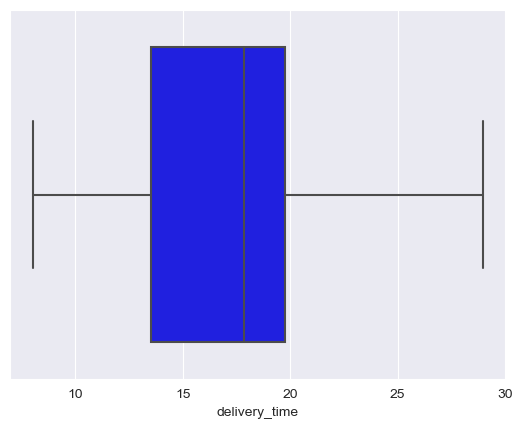

In [9]:
sns.boxplot(x=data["delivery_time"],color="blue")

0.047115474210530174


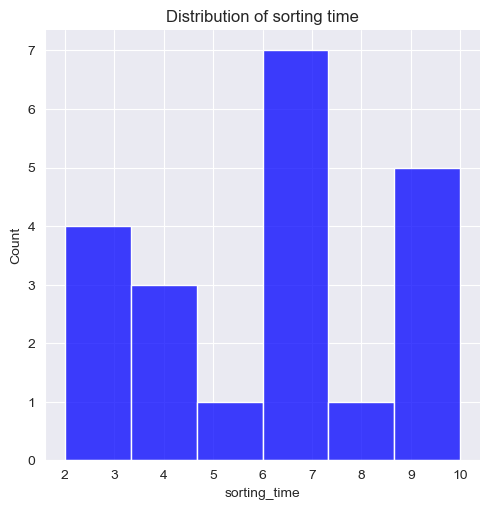

In [10]:
# distribution of sorting time--
sns.displot(x=data["sorting_time"], color="blue")
plt.title("Distribution of sorting time")
print(data["sorting_time"].skew())

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

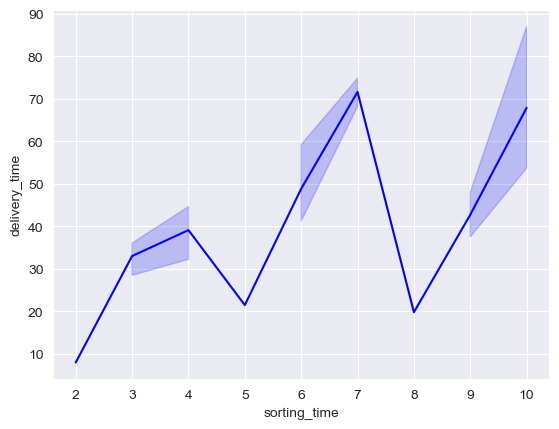

In [11]:
sns.lineplot(x="sorting_time",y="delivery_time",data=data,estimator="sum",color="blue")

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

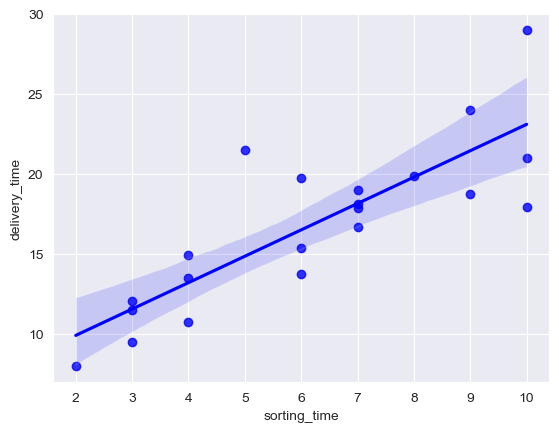

In [12]:
sns.regplot(x="sorting_time",y="delivery_time",data=data,color="blue")

<Axes: >

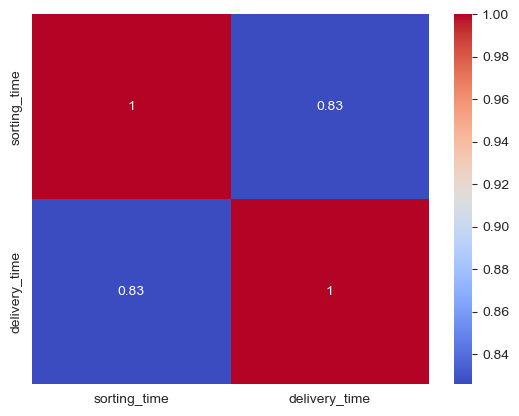

In [13]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

# Linear Regression

## Prediction of delivery time using sorting time

In [15]:
# creating the dataframe--
df=data
print(df.head())

   sorting_time  delivery_time
0            10          21.00
1             4          13.50
2             6          19.75
3             9          24.00
4            10          29.00


In [16]:
df.shape

(21, 2)

In [18]:
# sampling of data--
training,testing=train_test_split(df,test_size=0.2)

In [19]:
print(training.head())
training.shape

    sorting_time  delivery_time
17             7          18.11
15             4          14.88
20             5          21.50
0             10          21.00
16             6          13.75


(16, 2)

In [20]:
print(testing.head())
testing.shape

    sorting_time  delivery_time
11             4          10.75
2              6          19.75
12             7          16.68
7              3           9.50
8             10          17.90


(5, 2)

In [21]:
# defining--
X=training["sorting_time"]
y=training["delivery_time"]
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [22]:
# creating the object of linear regression model--
model=LinearRegression()
print(model)

LinearRegression()


In [23]:
train_model=model.fit(X,y)
print('Model training is completed')
print(train_model)

Model training is completed
LinearRegression()


In [24]:
print(model.coef_)        ### this is m value
print(model.intercept_)   ### this is b value 
                          ### y = mx + b

[[1.74234848]]
[6.48719697]


In [26]:
x= 9
y=round((model.coef_[0][0])*x + model.intercept_[0])
print("The delivery time for {} is {}.".format(x,y))

The delivery time for 9 is 22.


In [27]:
X_test=testing["sorting_time"].values.reshape(-1,1)
X_test

array([[ 4],
       [ 6],
       [ 7],
       [ 3],
       [10]], dtype=int64)

In [28]:
pred_delivery_time=train_model.predict(X_test)
pred_delivery_time

array([[13.45659091],
       [16.94128788],
       [18.68363636],
       [11.71424242],
       [23.91068182]])

In [29]:
testing["pred_del_time"]=pred_delivery_time
testing

,sorting_time,delivery_time,pred_del_time
11,4,10.75,13.456591
2,6,19.75,16.941288
12,7,16.68,18.683636
7,3,9.50,11.714242
8,10,17.90,23.910682


In [30]:
testing["Error"]=testing["delivery_time"]-testing["pred_del_time"]
testing

,sorting_time,delivery_time,pred_del_time,Error
11,4,10.75,13.456591,-2.706591
2,6,19.75,16.941288,2.808712
12,7,16.68,18.683636,-2.003636
7,3,9.50,11.714242,-2.214242
8,10,17.90,23.910682,-6.010682


In [31]:
round(r2_score(testing["delivery_time"],testing["pred_del_time"])*100,2)

26.58

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

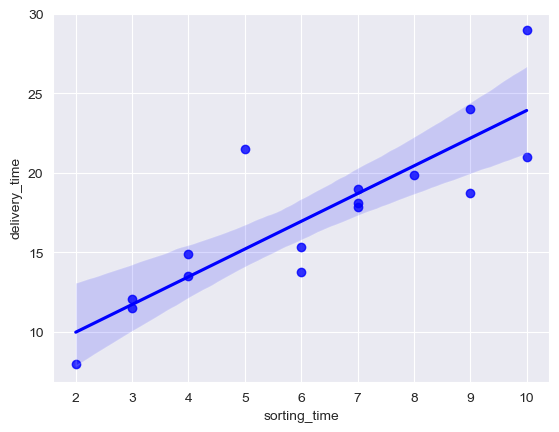

In [32]:
sns.regplot(x="sorting_time",y="delivery_time",data=training,color="blue")

<Axes: xlabel='sorting_time', ylabel='pred_del_time'>

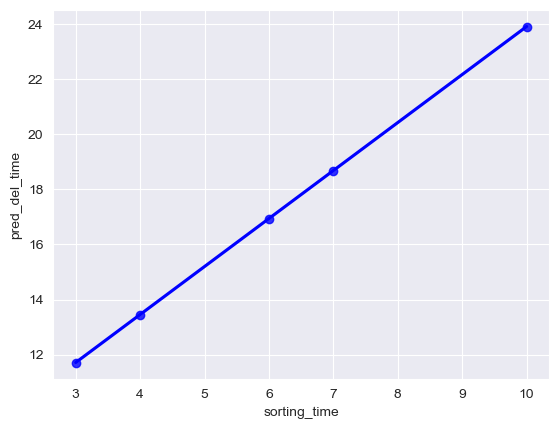

In [33]:
sns.regplot(x="sorting_time",y="pred_del_time",data=testing,color="blue")

## Using whole data for training

In [34]:
data_=data
print(data_.head())

   sorting_time  delivery_time
0            10          21.00
1             4          13.50
2             6          19.75
3             9          24.00
4            10          29.00


In [35]:
X1=data_["sorting_time"].values.reshape(-1,1)
y1=data_["delivery_time"].values.reshape(-1,1)
X1.shape,y1.shape

((21, 1), (21, 1))

In [36]:
model1= LinearRegression()
model_train1=model1.fit(X1,y1)
print("model training completed")

model training completed


In [37]:
print(model1.coef_)       ###  this is m value
print(model1.intercept_)  ###  this is y value
                               ###  y = mx + b

[[1.6490199]]
[6.58273397]


In [42]:
x1_= 9
y1=round((model1.coef_[0][0])*x1_ + (model1.intercept_[0]))
print("The delivery time for {} is {}.".format(x1_,y))

The delivery time for 9 is 22.


In [43]:
pred=model_train1.predict(X1)
pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [56]:
data_["pred_deliverytime"]=pred
print(data_.head())

   sorting_time  delivery_time  pred_deliverytime
0            10          21.00          23.072933
1             4          13.50          13.178814
2             6          19.75          16.476853
3             9          24.00          21.423913
4            10          29.00          23.072933


In [57]:
round(r2_score(data_["delivery_time"],data_["pred_deliverytime"])*100,2)

68.23

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

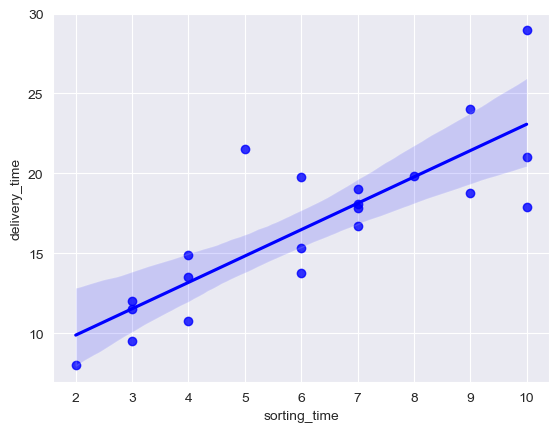

In [58]:
sns.regplot(x="sorting_time",y="delivery_time",data=data_,color="blue")

<Axes: xlabel='sorting_time', ylabel='pred_deliverytime'>

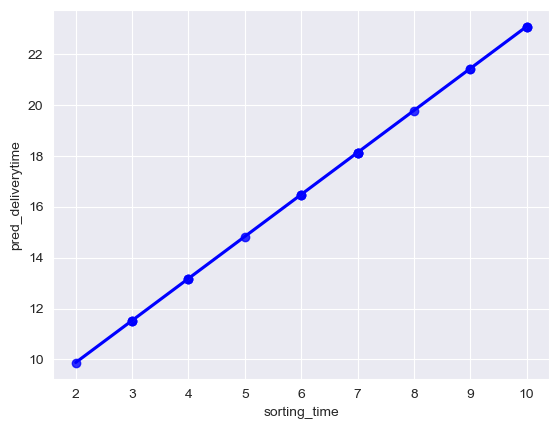

In [59]:
sns.regplot(x="sorting_time",y="pred_deliverytime",data=data_,color="blue")